# Red Wine Quality Analysis


### Predicting the Quality of Red Wine using Machine Learning Algorithms for Regression Analysis, Data Visualizations and Data Analysis.
### Dataset link :- https://www.kaggle.com/code/scsaurabh/red-wine-quality-analysis-python/data

<img src = "red wine.jpg" style = "width:400px;height:300px"/>

### Steps to follow:-
1. Import Libraries
2. Import Dataset
3. Data Exploration
4. Exploratory Data Analysis
5. Data Cleaning & Preprocessing
6. Model Building
7. Result
8. Testing
9. Conclusion

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Import Dataset

In [2]:
data = pd.read_csv("winequality-red.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Data Exploration

In [4]:
# Check shape of data
data.shape

(1599, 12)

We can see there are total 1599 observations with 12 different feature variables present in the Red Wine dataset.

In [5]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
#Check basic info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We can see that, all 12 columns are of numeric data types. Out of 12 variables, 11 are predictor variables and last one 'quality' is an response variable.

In [7]:
#Check statistical summary of data
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


* The summary of Red Wine dataset looks perfect, there is no visible abnormality in data (invalid/negative values).
* All the data seems to be in range (with different scales, which needs standardization).
* Let's look for the missing values in red wine dataset:

In [8]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

* No missing values found in wine dataset

In [9]:
# check unique values of dataset
data.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

* There are 6 unique values in quality column

### Exploratory Data Analysis (EDA)

* Check data distribution of quality column

In [10]:
data.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

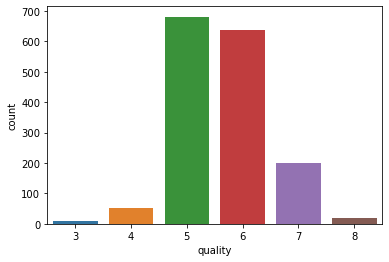

In [11]:
sns.countplot(data["quality"])
plt.show()

* The above distribution shows the range for response variable (quality) is between 3 to 8.

* Let's create a new discreet, categorical response variable/feature ('rating') from existing 'quality' variable.
* i.e. 
     * bad: 1-4
     * average: 5-6
     * good: 7-10

In [12]:
conditions = [
    (data['quality'] >= 7),
    (data['quality'] <= 4)
]
rating = ['good', 'bad']
data['rating'] = np.select(conditions, rating, default='average')
data.rating.value_counts()

average    1319
good        217
bad          63
Name: rating, dtype: int64

In [13]:
data.groupby('rating').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
average,8.254284,0.538560,0.258264,2.503867,0.088973,16.368461,48.946929,0.996867,3.311296,0.647263,10.252717,5.483700
bad,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270
good,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


* **check the corelation between the target variable and predictor variables,**

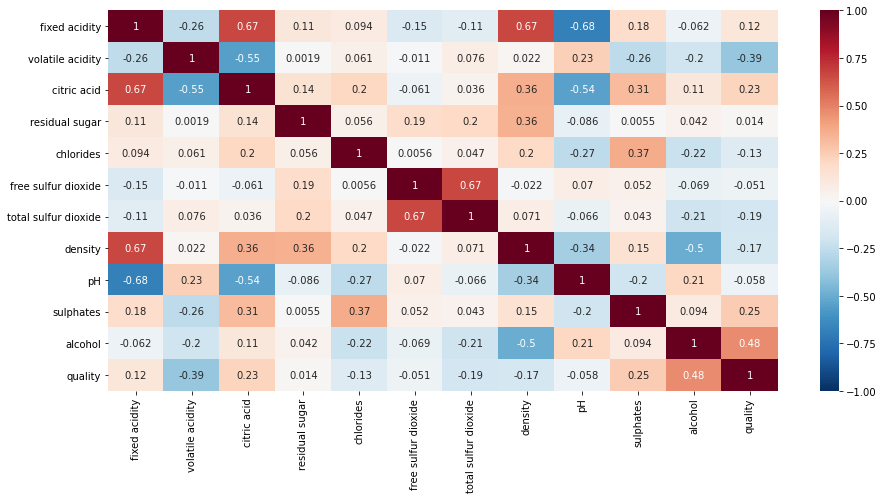

In [14]:
plt.figure(figsize=(15, 7))
sns.heatmap(data= data.corr(), annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.show()

In [15]:
a = data.corr()
a['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

* We can observe that, the '`alcohol`, `sulphates`, `citric acid` & `fixed acidity`' have maximum corelation with response variable '`quality`'.
* This means that, they need to be further analysed for detailed pattern and corelation exploration. Hence, we will use only these 4 variables in our future analysis.

**Analysis of alcohol percentage with wine quality:**

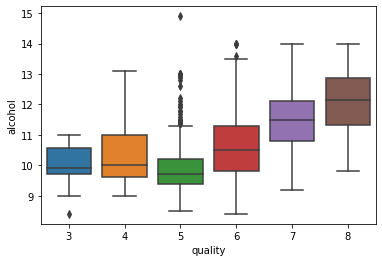

In [16]:
sns.boxplot(x="quality", y='alcohol', data = data)
plt.show()

**Analysis of sulphates & wine ratings:**

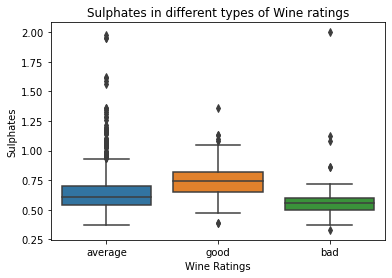

In [17]:
bx = sns.boxplot(x="rating", y='sulphates', data = data)
bx.set(xlabel='Wine Ratings', ylabel='Sulphates', title='Sulphates in different types of Wine ratings')
plt.show()

**Analysis of Citric Acid & wine ratings:**

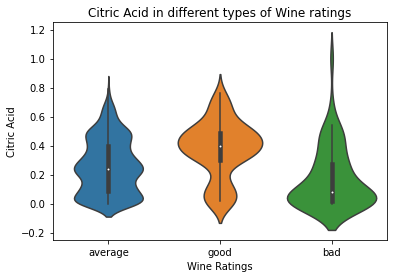

In [18]:
bx= sns.violinplot(x= "rating", y= "citric acid", data= data)
bx.set(xlabel='Wine Ratings', ylabel='Citric Acid', title='Citric Acid in different types of Wine ratings')
plt.show()

**Analysis of fixed acidity & wine ratings:**

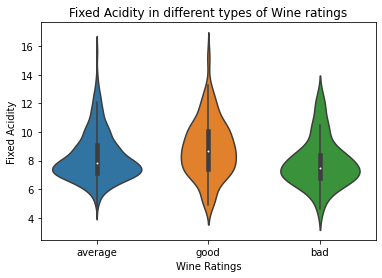

In [19]:
bx = sns.violinplot(x="rating", y='fixed acidity', data = data)
bx.set(xlabel='Wine Ratings', ylabel='Fixed Acidity', title='Fixed Acidity in different types of Wine ratings')
plt.show()

**Analysis of pH & wine ratings:**


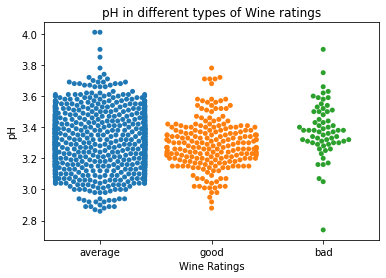

In [20]:
bx = sns.swarmplot(x="rating", y="pH", data = data);
bx.set(xlabel='Wine Ratings', ylabel='pH', title='pH in different types of Wine ratings')
plt.show()

**Use lmplot for different quality ratings shows a linear regression between residual_sugar & alcohol in red wine**

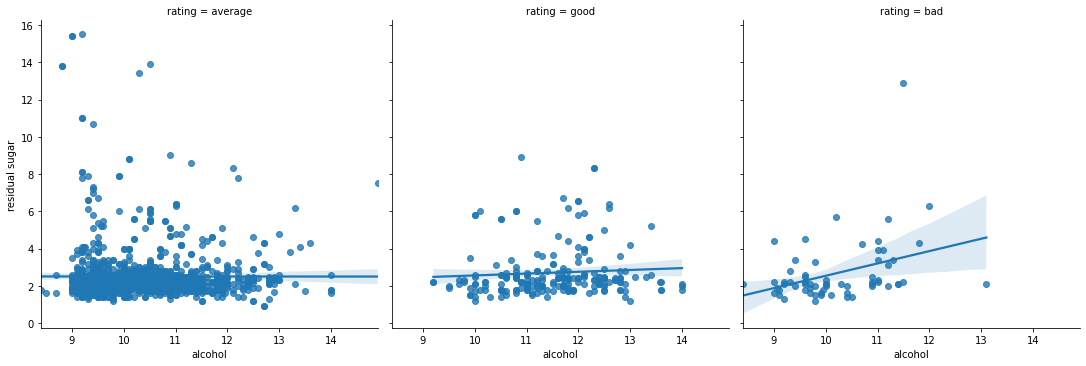

In [21]:
sns.lmplot(x = "alcohol", y = "residual sugar", col = "rating", data = data)
plt.show()

* The linear regression plots above for different wine quality `ratings` (bad, average & good) shows the regression between `alcohol` and `residual sugar` content of the red wine.
* We can observe from the trendline that, for good and average wine types the `residual sugar` content remains almost constant irrespective of alcohol content value. Whereas for bad quality wine, the `residual sugar` content increases gradually with the increase in `alcohol` content.
* This analysis can help in manufacturing the good quality wine with continuous monitoring and contrilling the `alcohol` and `residual sugar` content of the red wine.

### Data Cleaning and Preprocessing

In [22]:
#Change Categorical Data into numerical value
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data["rating"]= le.fit_transform(data["rating"])

In [23]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [24]:
data.rating.unique()

array([0, 2, 1])

* We observed that rating 0 = average, 1= good & 2= bad.

### Split Data Into Train and Test 

In [25]:
X = data.iloc[:,:-2]   #Independent variable
y = data['rating']      # Dependent variable

In [26]:
X.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


In [27]:
y.head(10)


0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    2
8    2
9    0
Name: rating, dtype: int32

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [29]:
print(X)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


### Train Test Split

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.25, random_state=0)

In [31]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1199, 11)
(1199,)
(400, 11)
(400,)


## Model Building

### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

lr.fit(X_train, y_train)
print("Logistic regression successfully implemented")

y_pred =  lr.predict(X_test)

# confussion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,y_pred)

print("Confusion Matrix:- ")
print(cm)

accuracy = accuracy_score(y_test,y_pred)

print("accuracy is:- ", accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

Logistic regression successfully implemented
Confusion Matrix:- 
[[325   0  14]
 [ 15   0   1]
 [ 28   0  17]]
accuracy is:-  85.5
Classification Report:-
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       339
           1       0.00      0.00      0.00        16
           2       0.53      0.38      0.44        45

    accuracy                           0.85       400
   macro avg       0.47      0.45      0.45       400
weighted avg       0.81      0.85      0.83       400



### Decision tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)
print("Decision Tree Algorithm is successfully implimented.")

y_pred = dtree.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

Decision Tree Algorithm is successfully implimented.
Confusion Matrix:- 
[[292   8  39]
 [ 11   3   2]
 [ 19   0  26]]
accuracy:-  80.25
Classification Report:-
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       339
           1       0.27      0.19      0.22        16
           2       0.39      0.58      0.46        45

    accuracy                           0.80       400
   macro avg       0.52      0.54      0.52       400
weighted avg       0.82      0.80      0.81       400



### Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
print("Rndom Forest Classifier successfully Implimented")

y_pred = rfc.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))

Rndom Forest Classifier successfully Implimented
Confusion Matrix:- 
[[328   0  11]
 [ 16   0   0]
 [ 18   0  27]]
accuracy:-  88.75
Classification Report:-
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       339
           1       0.00      0.00      0.00        16
           2       0.71      0.60      0.65        45

    accuracy                           0.89       400
   macro avg       0.54      0.52      0.53       400
weighted avg       0.85      0.89      0.87       400



### Support Vector Machine

In [35]:
from sklearn.svm import SVC
svc= SVC()

svc.fit(X_train, y_train)
print("Support vactor classifier is successfully implemented")

y_pred = svc.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))


Support vactor classifier is successfully implemented
Confusion Matrix:- 
[[333   0   6]
 [ 16   0   0]
 [ 30   0  15]]
accuracy:-  87.0
Classification Report:-
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       339
           1       0.00      0.00      0.00        16
           2       0.71      0.33      0.45        45

    accuracy                           0.87       400
   macro avg       0.53      0.44      0.46       400
weighted avg       0.82      0.87      0.84       400



### K Nearest Neighbors Classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 7)
knn.fit(X_train, y_train)

print("K-Nearest Neighbors classifier is successfully implemented")

y_pred = knn.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))


K-Nearest Neighbors classifier is successfully implemented
Confusion Matrix:- 
[[318   0  21]
 [ 16   0   0]
 [ 24   0  21]]
accuracy:-  84.75
Classification Report:-
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       339
           1       0.00      0.00      0.00        16
           2       0.50      0.47      0.48        45

    accuracy                           0.85       400
   macro avg       0.46      0.47      0.47       400
weighted avg       0.81      0.85      0.83       400



### Ada Boost Classifier

In [37]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(X_train, y_train)

print("Ada Boost Classifier is successfully implemented")

y_pred = adb.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
accuracy = accuracy_score(y_test,y_pred)

print("accuracy:- ", accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))


Ada Boost Classifier is successfully implemented
Confusion Matrix:- 
[[284  12  43]
 [ 13   3   0]
 [ 13   1  31]]
accuracy:-  79.5
Classification Report:-
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       339
           1       0.19      0.19      0.19        16
           2       0.42      0.69      0.52        45

    accuracy                           0.80       400
   macro avg       0.51      0.57      0.53       400
weighted avg       0.83      0.80      0.81       400



### Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("Naive Bayes is successfully implemented")

y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
print("Confusion Matrix:- ")
print(cm)

# Accuracy test
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:- ", accuracy*100)

print("Classification Report:-")
print(  classification_report(y_test, y_pred))


Naive Bayes is successfully implemented
Confusion Matrix:- 
[[273  15  13]
 [ 10   0   0]
 [ 56   1  32]]
accuracy:-  76.25
Classification Report:-
              precision    recall  f1-score   support

           0       0.91      0.81      0.85       339
           1       0.00      0.00      0.00        16
           2       0.36      0.71      0.48        45

    accuracy                           0.76       400
   macro avg       0.42      0.51      0.44       400
weighted avg       0.81      0.76      0.78       400



## Result:-

1. Accuracy of Logistic Regression :- **85.5 %**
2. Accuracy of Decision Tree :- **80.25 %**
3. Accuracy of Random Forest Classifier :- **88.75 %**
4. Accuracy of Support Vecor Machine :- **87 %**
5. Accuracy of K Nearest Neighbors Classifier :- **84.75%**
6. Accuracy of Ada Boost Classifier :- **79.5 %**
7. Accuracy of Naive Bayes :- **76.25 %**

### Testing Model

In [39]:
a= np.array(y_test)
predicted = np.array(rfc.predict(X_test))
df=pd.DataFrame({"original":a, "predcted": predicted}, index= range(len(a)))
df.head(50)

,original,predcted
0,0,0
1,0,0
2,2,2
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,1,0
9,0,0


### Conclusion
* We observed the key factors that determine and affects the quality of the red wine. Wine quality is ultimately a subjective measure. The ordered factor '`quality`' was not very helpful and to overcome this, so we created another variable called '`rating`'.
* To make predictions of wine quality and any other if required, we trained following models 'LogisticRegression','DecisionTree', 'RandomForestClassifier', 'Support Vector Classifier', 'KNearestNeighbors', 'AdaBoostClassifier','GaussianNB'. The **Random Forest Classifier** performed better its accuracy is **88.75%** and we decided to stick with it.
* The usage of this analysis will help to understand whether by modifying the variables, it is possible to increase the quality of the wine on the market. If you can control your variables, then you can predict the quality of your wine and obtain more profits.

## Model Created Successfully !

# Thank you!